## Output of the analysis

### 1. Revert activities in general

In [1]:
# Obtain revert network data
# Import the module to create the network
from module.create_network import (
    Text2Data,
    CreateEditHistory,
    CreateNetwork,
    CreateNode,
)

# Set the path to the
data_path = "../data/foo.txt"  # Masked the path to the data file as it is confidential
# Create an instance of Text2Data
text2data = Text2Data(data_path)
# Create the data
data = text2data.text_to_data()

create_edit_history = CreateEditHistory(data)
edit_history = create_edit_history.create_edit_history()

# Create the revert network
network_creator = CreateNetwork(data, edit_history)
network = network_creator.create_network()

# Create the nodes
node_creator = CreateNode(network)
nodes = node_creator.create_node()

# Print the first 5 edges
print(
    "First 5 data points in the network with name of a reverter, name of a reverted, timestamp of revert, \nseniority of the reverter and seniority of the reverted in the network:"
)
for i in range(5):
    print(network[i])

# Get the number of nodes by creating a set of all the editors
print(f"Number of nodes in the network: {len(nodes)}")

# Get the number of edges by counting the number of elements in the network
print(f"Number of edges in the network: {len(network)}")

First 5 data points in the network with name of a reverter, name of a reverted, timestamp of revert, 
seniority of the reverter and seniority of the reverted in the network:
['Thijs!bot', 'RobotQuistnix', datetime.datetime(2006, 8, 27, 0, 39, 41), 3.427972713608209, 4.475743806748126]
['TSO1D', 'Zwobot', datetime.datetime(2006, 1, 25, 0, 12, 36), 2.5211380837040362, 3.029789470831856]
['Laurap', '86.55.176.66', datetime.datetime(2006, 5, 5, 7, 52, 54), 3.529430354366986, 1.255272505103306]
['Alex:D', '89.120.204.229', datetime.datetime(2006, 12, 12, 22, 28, 26), 3.243534101832062, 0.0]
['Pixi', '68.32.229.23', datetime.datetime(2006, 12, 9, 6, 31, 57), 3.485011214578573, 0.6989700043360189]
Number of nodes in the network: 4719
Number of edges in the network: 7097


### 2. Mutual revert actitivities


In [2]:
## Import the module to find the AB-BA event sequences
from module.find_revert_back import FindRevertBack

# Create the object
frb = FindRevertBack(network)

# Get AB-BA event sequences (reverts occur within 24 hours of each other)
event_sequences = frb.create_revert_event()

# Print the number of event sequences
# Divide by 2 because each event sequence is counted twice (AB-BA)
print(f"Number of event sequences: {len(event_sequences)}")

Number of event sequences: 190


### 3. Similarity in seniority


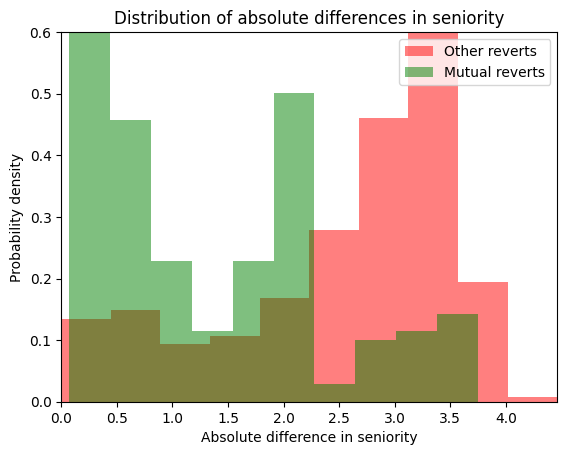

Mean |s_A - s_B| for mutual revert sequences: 1.289475747002354
Mean $|s_i - s_j| for other reverts: 2.5423509417227868


In [3]:
# Import modules to calculate and plot the similarity function
from module.calculate_similarity import CreateComparisonNetwork, CalculateSimilarity
from module.visualise import VisualiseSimilarity

# Create similarity objects
comparison_network = CreateComparisonNetwork(event_sequences, network)
similarity_abba = CalculateSimilarity()
similarity_other = CalculateSimilarity()

# Create a sequence for all reverts that are not in AB-BA sequences
other_reverts = comparison_network.create_comparison_network()

# Get absolute seniority difference for reverts in AB-BA sequences
ab_ba_differences = similarity_abba.calc_abs_difference(event_sequences)
# Get absolute seniority difference for all other reverts
other_reverts_differences = similarity_other.calc_abs_difference(other_reverts)

# Plot a histogram with the two distributions overlapping
# Probability density is used to compare the distributions of samples as the number of samples is different
visualise = VisualiseSimilarity(ab_ba_differences, other_reverts_differences)
visualise.visualise_similarity()

# Print the mean abs. seniority diff. for reverts in AB-BA sequences and the rest
# Print the mean absolute differences
print(f"Mean |s_A - s_B| for mutual revert sequences: {similarity_abba.calc_mean_similarity(ab_ba_differences)}")
print(f"Mean $|s_i - s_j| for other reverts: {similarity_other.calc_mean_similarity(other_reverts_differences)}")